# Monte Carlo Simulation
Simulation Evolving Randomly

The idea is to test various outcomes probabilities. It can be used to asses risk of a given trading strategy with options or stocks. It can help someone visualize the potential outcomes to have a much better idea regarding the risk of a decision.

### Gambling Scenario

In [122]:
import random
import matplotlib
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D

In [83]:
# Pseudo-random Number Generator
class Roll(object):
    def rollDice():
        roll = random.randint(1,100)
        if roll == 100 or roll <= 50:
            # print (roll, 'You lose. Try again!')
            return False
        else:
            # print( roll, 'You Win. Play more!')
            return True
        
    def rollDice_5050():
        roll = random.randint(1,100)
        if roll <= 50:
            return False
        else:
            return True

roll = Roll

In [84]:
class bettor(object):
    
    def simple_bettor(funds, wager_amount, wager_count):
        curr_value = funds

        # Generate plots (X-axis = wager, Y-axis = value)
        wX = []
        vY = []

        for wager in range(1, 1+wager_count):
            if roll.rollDice():
                curr_value += wager_amount
            else:
                curr_value -= wager_amount
                
            wX.append(wager)
            vY.append(curr_value)
        
            if curr_value < 0:
                # print('We are broke!')
                break
            
        return curr_value , wX , vY
    
    def double_bettor(funds, wager_amount, wager_count):
        '''
            This strategy is to double the bet if loss and return to the original bet if win.
        '''
        curr_value = funds
        initial_wager = wager_amount
        
        wX = []
        vY = []

        for currWager in range( 1 , wager_count+1 ):

            if roll.rollDice():
                curr_value += wager_amount
                # print(currWager,'\tWin\t',curr_value)
                wager_amount = initial_wager
            else:
                curr_value -= wager_amount
                # print(currWager, '\tLoss\t', curr_value)
                wager_amount *= 2

            wX.append(currWager)
            vY.append(curr_value)

            if curr_value < 0:
                # print('We are broke!')
                break

        # print ('Final Vale =',curr_value)
        return curr_value , wX , vY

    def wise_double_bettor(funds, wager_amount, wager_count):
        '''
            This strategy is to double the bet if loss and return to the original bet if win.
        '''
        curr_value = funds
        initial_wager = wager_amount
        
        wX = []
        vY = []

        for currWager in range( 1 , wager_count+1 ):
            
            if (curr_value - wager_amount) < 0: # Prevent going on debt
                wager_amount = curr_value

            if roll.rollDice():
                curr_value += wager_amount
                # print(currWager,'\tWin\t',curr_value)
                wager_amount = initial_wager
            else:
                curr_value -= wager_amount
                # print(currWager, '\tLoss\t', curr_value)
                wager_amount *= 2

            wX.append(currWager)
            vY.append(curr_value)

            if curr_value < 0:
                # print('We are broke!')
                break

        # print ('Final Vale =',curr_value)
        return curr_value , wX , vY

    def multiple_bettor(funds, wager_amount, wager_count, random_multiple):
        '''
            This strategy is to multiple the bet if loss and return to the original bet if win.
        '''
        curr_value = funds
        initial_wager = wager_amount
        
        wX = []
        vY = []

        for currWager in range( 1 , wager_count+1 ):

            if roll.rollDice():
                curr_value += wager_amount
                # print(currWager,'\tWin\t',curr_value)
                wager_amount = initial_wager
            else:
                curr_value -= wager_amount
                # print(currWager, '\tLoss\t', curr_value)
                wager_amount *= random_multiple

            wX.append(currWager)
            vY.append(curr_value)

            if curr_value < 0:
                # print('We are broke!')
                break

        # print ('Final Vale =',curr_value)
        return curr_value , wX , vY
    
    def dAlembert(funds, wager_amount, wager_count):
        '''
            D'Alembert Strategy:- 
                - A popular 50/50 Strategy 
                - Increment gradually when lose
                - Decrement gradually when win
        '''
        curr_value = funds
        initial_wager = wager_amount
        
        wX = []
        vY = []

        for currWager in range( 1 , wager_count+1 ):
            
            if (curr_value - wager_amount) < 0: # Prevent going on debt
                wager_amount = curr_value

            if roll.rollDice_5050():
                curr_value += wager_amount
                if wager_amount == initial_wager:
                    pass
                else:
                    wager_amount -= initial_wager
                # print(currWager, '\tWin\t', curr_value)
            else:
                curr_value -= wager_amount
                wager_amount += initial_wager
                # print(currWager, '\tLoss\t', curr_value)

            wX.append(currWager)
            vY.append(curr_value)

            if curr_value <= 0:
                # print('We are broke!')
                break

        # print ('Final Vale =',curr_value)
        return curr_value , wX , vY


mybettor = bettor

In [85]:
# Simple Bettor with different initial values
for initial_value in range(100,1001,100):
    c = 0
    for bettor in range(100):
        final_value,wX,vY = mybettor.simple_bettor(10000,initial_value,1000)
        if final_value <= 0:
            c+=1
        
    print(f'initial_value = {initial_value}\tCount of Brokes ={c}')

initial_value = 100	Count of Brokes =0
initial_value = 200	Count of Brokes =25
initial_value = 300	Count of Brokes =54
initial_value = 400	Count of Brokes =59
initial_value = 500	Count of Brokes =65
initial_value = 600	Count of Brokes =69
initial_value = 700	Count of Brokes =85
initial_value = 800	Count of Brokes =79
initial_value = 900	Count of Brokes =83
initial_value = 1000	Count of Brokes =91


Can we find a better multiple?

We will use Monte Carlo Simulation to tell us whether we can find a better multiple to use rather than 2.

In [86]:
bust_threshold , profit_threshold = 31.235 ,  63.208
sample_size , funds, wager_amount, wager_count = 100, 10000, 100, 100

while True: # Monte Carlo Simulator
    r = random.uniform(0.1 , 10)
    multiple_busts , multiple_profits = 0 , 0
    for j in range(sample_size):
        multiple_final,_,_ = mybettor.multiple_bettor(funds, wager_amount, wager_count, r)
        if multiple_final <= 0:
            multiple_busts += 1
        if multiple_final > funds:
            multiple_profits += 1
        
    # print(multiple_profits,multiple_busts)
    if ((multiple_busts/sample_size)*100.0 <= bust_threshold) and ((multiple_profits/sample_size)*100.0 >= profit_threshold):
        print(f'Best Multiple = {r}')
        print(f'Multiple busts = {(multiple_busts/sample_size)*100.0}%')
        print(f'Multiple profits = {(multiple_profits/sample_size)*100.0}%')
        print('#####################')



Best Multiple = 1.8817015360849234
Multiple busts = 10.0%
Multiple profits = 87.0%
#####################
Best Multiple = 1.6745072199300457
Multiple busts = 13.0%
Multiple profits = 73.0%
#####################
Best Multiple = 2.079962465224319
Multiple busts = 31.0%
Multiple profits = 68.0%
#####################
Best Multiple = 1.858508336161943
Multiple busts = 19.0%
Multiple profits = 79.0%
#####################
Best Multiple = 1.5117254223291765
Multiple busts = 2.0%
Multiple profits = 65.0%
#####################
Best Multiple = 1.9650745381378631
Multiple busts = 28.000000000000004%
Multiple profits = 71.0%
#####################
Best Multiple = 1.8355614282622024
Multiple busts = 17.0%
Multiple profits = 81.0%
#####################
Best Multiple = 2.0661976462484986
Multiple busts = 27.0%
Multiple profits = 71.0%
#####################
Best Multiple = 1.6311243860602742
Multiple busts = 6.0%
Multiple profits = 68.0%
#####################
Best Multiple = 1.9535951542519383
Multiple b

KeyboardInterrupt: 

In [125]:
sample_size, funds = 1000 , 100000

while True: # Monte Carlo Simulation to find best estimated value for a couple of variables
    da_busts , da_profits , Return = 0 , 0 , 0
    wager_amount = random.uniform(1.0 , 1000.0)
    wager_count = random.randint(10 , 10000)

    for bettor in range(sample_size):

        final_value,wX,vY = mybettor.dAlembert(funds,wager_amount,wager_count)
        Return += final_value

        if final_value <= 0:
            da_busts+=1
        if final_value > funds:
            da_profits+=1    

    ROI = Return - (sample_size * funds)
    total_invested = sample_size*funds
    roi_percent = (ROI/total_invested) * 100.0
    wager_amount_percent = (wager_amount/funds)*100.0

    if roi_percent > 2.0:    
        print(f'*** Wager Amount = {wager_amount_percent}% ***')
        print(f'*** Wager Count = {wager_count} ***')
        print(f'Totoal Invested = {total_invested}')
        print(f'Totoal Return = {Return}')
        print(f'*** Return of Investment = {ROI} = {roi_percent}% ***')
        print(f'Bust Rate = {(da_busts/sample_size) * 100.0}%')
        print(f'Profit Rate = {(da_profits/sample_size) * 100.0}%')
        print('___________________________________________________')
        
        saveFile = open('monte_carlo_liberal.csv' , 'a')
        saveLine = '\n'+str(roi_percent)+','+str(wager_amount_percent)+','+str(wager_count)+',g'
        saveFile.write(saveLine)
        saveFile.close()

    elif roi_percent < -2.0:    
        print(f'*** Wager Amount = {wager_amount_percent}% ***')
        print(f'*** Wager Count = {wager_count} ***')
        print(f'Totoal Invested = {total_invested}')
        print(f'Totoal Return = {Return}')
        print(f'*** Return of Investment = {ROI} = {roi_percent}% ***')
        print(f'Bust Rate = {(da_busts/sample_size) * 100.0}%')
        print(f'Profit Rate = {(da_profits/sample_size) * 100.0}%')
        print('___________________________________________________')
        
        saveFile = open('monte_carlo_liberal.csv' , 'a')
        saveLine = '\n'+str(roi_percent)+','+str(wager_amount_percent)+','+str(wager_count)+',r'
        saveFile.write(saveLine)
        saveFile.close()

*** Wager Amount = 0.28568858320359397% ***
*** Wager Count = 2850 ***
Totoal Invested = 100000000
Totoal Return = 93597804.17238909
*** Return of Investment = -6402195.82761091 = -6.402195827610909% ***
Bust Rate = 77.0%
Profit Rate = 22.6%
___________________________________________________
*** Wager Amount = 0.27841966218970543% ***
*** Wager Count = 8346 ***
Totoal Invested = 100000000
Totoal Return = 102385187.80890474
*** Return of Investment = 2385187.8089047372 = 2.385187808904737% ***
Bust Rate = 89.4%
Profit Rate = 10.299999999999999%
___________________________________________________
*** Wager Amount = 0.4667213099498137% ***
*** Wager Count = 4038 ***
Totoal Invested = 100000000
Totoal Return = 93540037.75970227
*** Return of Investment = -6459962.240297735 = -6.459962240297735% ***
Bust Rate = 89.1%
Profit Rate = 10.9%
___________________________________________________
*** Wager Amount = 0.7239890873279773% ***
*** Wager Count = 275 ***
Totoal Invested = 100000000
Totoal

KeyboardInterrupt: 

### Visualizing with matplotlib
This helps in revealing the trajectory of each bettor and comparing different strategies.

Profit Chances =15.0%


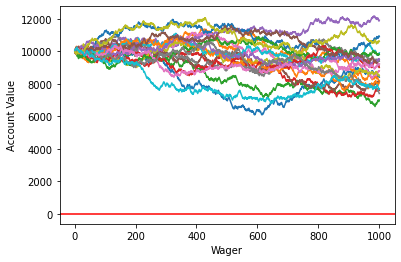

In [88]:
# Simple Bettor
simple_profit , funds = 0 , 10000
for bettor in range(20):
    final_value, wX, vY = mybettor.simple_bettor(funds,50,1000)
    plt.plot(wX,vY)
    if final_value >= funds:
        simple_profit += 1 
    
print(f'Profit Chances ={(simple_profit/20) * 100}%')
plt.xlabel('Wager')
plt.ylabel('Account Value')
plt.axhline(0,color = 'r')  
plt.show()

The survival rates of the simple bettor for:

    - Short term is good
    - Medium term: might survive, but would not make much money
    - Long term: would die 

Death rate =78.0%
Survival rate =22.0%
Profit Chances =21.0%


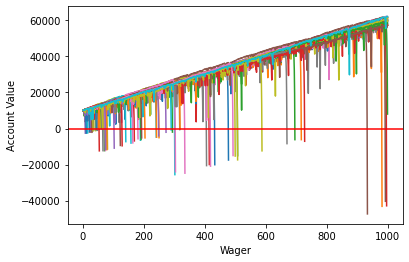

In [89]:
# Double Bettor
count_brokes , funds , doubler_profit = 0 , 10000 , 0
for i in range(100):
    final_value, wX, vY = mybettor.double_bettor(funds, 100 , 1000)
    plt.plot(wX,vY)
    if final_value <= 0:
        count_brokes+=1
    if final_value >= funds:
        doubler_profit += 1 

print(f'Death rate ={(count_brokes/100) * 100}%')
print(f'Survival rate ={((100-count_brokes)/100) * 100}%')
print(f'Profit Chances ={(doubler_profit/100) * 100}%')
plt.xlabel('Wager')
plt.ylabel('Account Value')
plt.axhline(0,color = 'r')  
plt.show()

Death rate =86.0%
Survival rate =14.000000000000002%
Profit Chances =21.0%


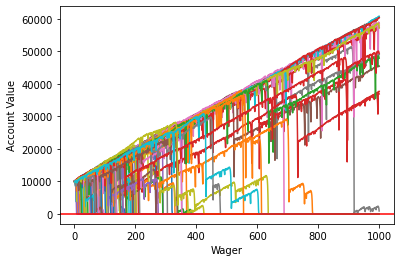

In [90]:
# Wise Double Bettor
count_brokes , wise_doubler_profit , funds = 0 , 0 , 10000
for i in range(100):
    final_value, wX, vY = mybettor.wise_double_bettor(10000, 100 , 1000)
    plt.plot(wX,vY)
    if(final_value) <= 0:
        count_brokes+=1
    if final_value >= funds:
        wise_doubler_profit += 1 

print(f'Death rate ={(count_brokes/100) * 100}%')
print(f'Survival rate ={((100-count_brokes)/100) * 100}%')
print(f'Profit Chances ={(doubler_profit/100) * 100}%')
plt.xlabel('Wager')
plt.ylabel('Account Value')
plt.axhline(0,color = 'r')  
plt.show()

Death rate for simple bettor = 2.0%	Survival rate = 98.0%	Profit Chance = 32.0%	Avg Profit = 15600
Death rate for simple bettor = 78.0%	Survival rate = 22.0%	Profit Chance = 22.0%	Avg Profit = 61500
Death rate for simple bettor = 99.0%	Survival rate = 1.0%	Profit Chance = 1.0%	Avg Profit = 503700


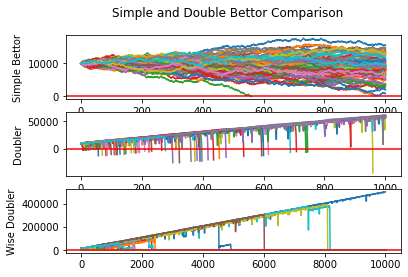

In [91]:
# Comparison between Simple and Double Bettor
simple_brokes , double_brokes , wise_doubler_brokes = 0 , 0 , 0
simple_profit , doubler_profit , wise_doubler_profit = 0 , 0 , 0
simple_max , doubler_max , wise_doubler_max = 0 , 0 , 0

funds = 10000
fig , (simple_plt , double_plt, wise_doubler_plt) = plt.subplots(3,1) # 1 row and 2 columns

for i in range(100):
    fig.suptitle('Simple and Double Bettor Comparison')
    simple_final, wX_simple, vY_simple = mybettor.simple_bettor(funds , 100 , 1000)
    simple_plt.plot(wX_simple , vY_simple)

    double_final, wX_double, vY_double = mybettor.double_bettor(funds , 100 , 1000)
    double_plt.plot(wX_double , vY_double)
    
    wise_double_final, wX_wise_double, vY_wise_double = mybettor.wise_double_bettor(funds , 100 , 10000)
    wise_doubler_plt.plot(wX_wise_double , vY_wise_double)

    simple_max = max(simple_final,simple_max)
    doubler_max = max(double_final,doubler_max)
    wise_doubler_max = max(wise_double_final,wise_doubler_max)

    if simple_final <= 0:
        simple_brokes += 1
    if simple_final > funds:
        simple_profit += 1

    if double_final <= 0:
        double_brokes += 1
    if double_final > funds:
        doubler_profit += 1

    if wise_double_final <= 0:
        wise_doubler_brokes += 1
    if wise_double_final > funds:
        wise_doubler_profit += 1

print(f'Death rate for simple bettor = {(simple_brokes/100) * 100}%\tSurvival rate = {((100-simple_brokes)/100) * 100}%\tProfit Chance = {(simple_profit/100)*100}%\tAvg Profit = {simple_max}')
print(f'Death rate for simple bettor = {(double_brokes/100) * 100}%\tSurvival rate = {((100-double_brokes)/100) * 100}%\tProfit Chance = {(doubler_profit/100)*100}%\tAvg Profit = {doubler_max}')
print(f'Death rate for simple bettor = {(wise_doubler_brokes/100) * 100}%\tSurvival rate = {((100-wise_doubler_brokes)/100) * 100}%\tProfit Chance = {(wise_doubler_profit/100)*100}%\tAvg Profit = {wise_doubler_max}')
simple_plt.axhline(0, color = 'r')
simple_plt.set_ylabel('Simple Bettor')

double_plt.axhline(0,color = 'r') 
double_plt.set_ylabel('Doubler')

wise_doubler_plt.axhline(0,color = 'r') 
wise_doubler_plt.set_ylabel('Wise Doubler')

plt.show()

For a simple bettor, you have a higher chance to make a profit, but the profit amount itself would be much less than the doublers.

Totoal Invested = 10000000
Totoal Return = 9355600
Return of Investment = -644400
Bust Rate = 23.0%
Profit Rate = 63.0%


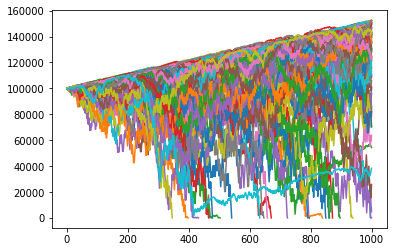

In [92]:
da_busts , da_profits , Return = 0 , 0 , 0
sample_size, funds = 100 , 100000

for bettor in range(sample_size):
    final_value,wX,vY = mybettor.dAlembert(funds,100,1000)
    Return += final_value

    if final_value <= 0:
        da_busts+=1
    if final_value > funds:
        da_profits+=1    
    plt.plot(wX,vY)

print(f'Totoal Invested = {sample_size*funds}')
print(f'Totoal Return = {Return}')
print(f'Return of Investment = {Return - (sample_size * funds)}')
print(f'Bust Rate = {(da_busts/sample_size) * 100.0}%')
print(f'Profit Rate = {(da_profits/sample_size) * 100.0}%')
plt.show()

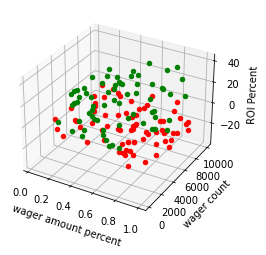

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111 , projection = '3d')

def gragh():
    with open('monte_carlo_liberal.csv','r') as monte_carlo:
        data = csv.reader(monte_carlo, delimiter=',')

        for line in data:
            roi_percent , wager_amount_percent , wager_count , pcolor = float(line[0]) , float(line[1]) , float(line[2]) , line[3]
            ax.scatter(wager_amount_percent , wager_count , roi_percent , color=pcolor)
            ax.set_xlabel( 'wager amount percent'  )
            ax.set_ylabel( 'wager count'  )
            ax.set_zlabel( 'ROI Percent'  )

    plt.show()

gragh()